<a href="https://colab.research.google.com/github/bengi123/IntroToAIProject/blob/main/IntroToAIProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#FINAL PROJECT

### Benjamin Brown

In [459]:
# imports
import requests
from bs4 import BeautifulSoup
import os
import re
import urllib
import json
import time
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [460]:
# get user input

def print_one_letter_at_a_time(message):
    for letter in message:
        print(letter, end='', flush=True)
        time.sleep(0.00)  # Adjust the sleep duration to control the speed

# Welcome message
welcome_message = "Welcome to The Music Recommender App"
input_message = "Please, input your lyric keyword(s) or a believed song title and then we will handle the rest:"

print_one_letter_at_a_time(welcome_message)
print("\n")

print_one_letter_at_a_time(input_message)
print("\n")

# Ask for user input
search_term = input()

Welcome to The Music Recommender App

Please, input your lyric keyword(s) or a believed song title and then we will handle the rest:

super


In [461]:
#@title Token
client_access_token = "TeQ7BUxahGZYJxDCUO8i9CYno_Bs0RYCnGK1_nKQB1yzz2gaxdjZLKRcJQLdNdOn"

In [462]:
# Define the search term and API details

#format URI
#search_term = "super"
_URL_API = "https://api.genius.com/"
_URL_SEARCH = "search?q="
#client_access_token = "TeQ7BUxahGZYJxDCUO8i9CYno_Bs0RYCnGK1_nKQB1yzz2gaxdjZLKRcJQLdNdOn"

# Initialize a list to store all the hits
all_hits = []

# Make requests for multiple pages
for page_number in range(1, 6):  #With 1 results per page, I go through 5 pages to get 50 results
    querystring = f"{_URL_API}{_URL_SEARCH}{urllib.parse.quote(search_term)}&per_page=10&page={page_number}"
    request = urllib.request.Request(querystring)
    request.add_header("Authorization", "Bearer " + client_access_token)
    request.add_header("User-Agent", "")
    response = urllib.request.urlopen(request, timeout=3) # make request to database
    data = response.read()
    json_obj = json.loads(data) # convert to json

    # Add the hits from this page to the list of all hits
    all_hits.extend(json_obj['response']['hits'])


In [463]:
# print 50 titles
for hit in all_hits:
    print(hit['result']['title'])

# nNEXT STEP: take the titles and find the nearest neighbors ,of sklearn ,of them after converting the titles into numberical forms

​iSpy
Superman
Super Rich Kids
Supermarket Flowers
Super Bass
Supermodel
Super Far
Súper Jon Z (Residente Challenge)
Doomsday
Super Freaky Girl
Rapp Snitch Knishes
Mi Gna
Beef Rap
Supercut
Champagne Supernova
Don’t Wanna Fall in Love
One Beer
Jump Up, Super Star!
Superhero (Heroes & Villains)
It’s You
Superpower
Hoe Cakes
Jopping
Superstition
Super Mario World
That’s That
Super Gremlin
Супермаркет (Supermarket)
ALIEN SUPERSTAR
Deep Fried Frenz
Rhymes Like Dimes
Superstar
Playinwitme
Lifelight - Super Smash Bros. Ultimate Main Theme
Super Freaky Girl (Roman Remix)
Breakfast in America
Super Saiyan
Superheroes
Superstars
The Logical Song
Super Ugly [I Got Myself A Gun]
List of WWE Superstar Nicknames
SUPERPOSITION
Doubt It
Superclassico
Potholderz
Supernova
Ikuyo
Gazzillion Ear
Super General (Freestyle)


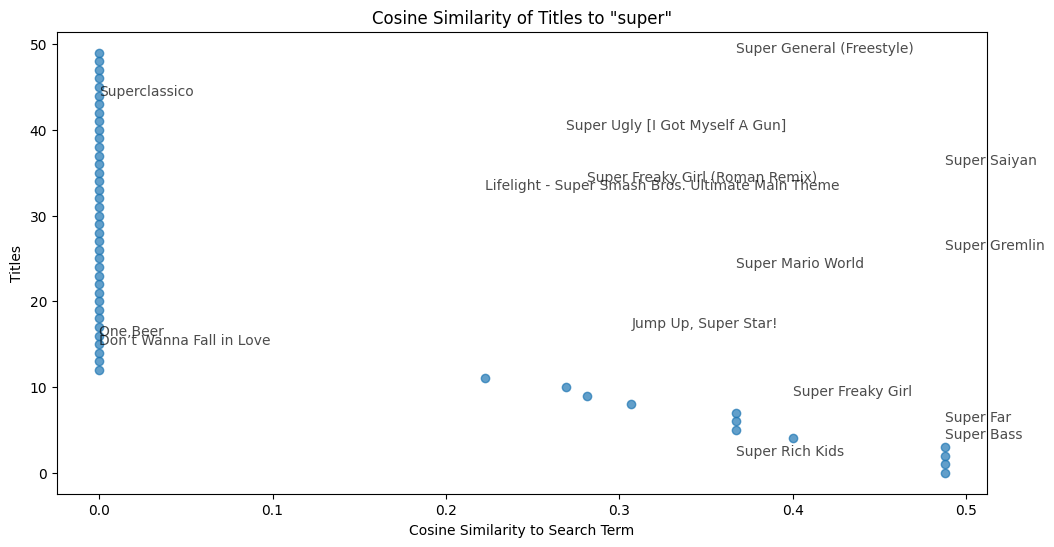

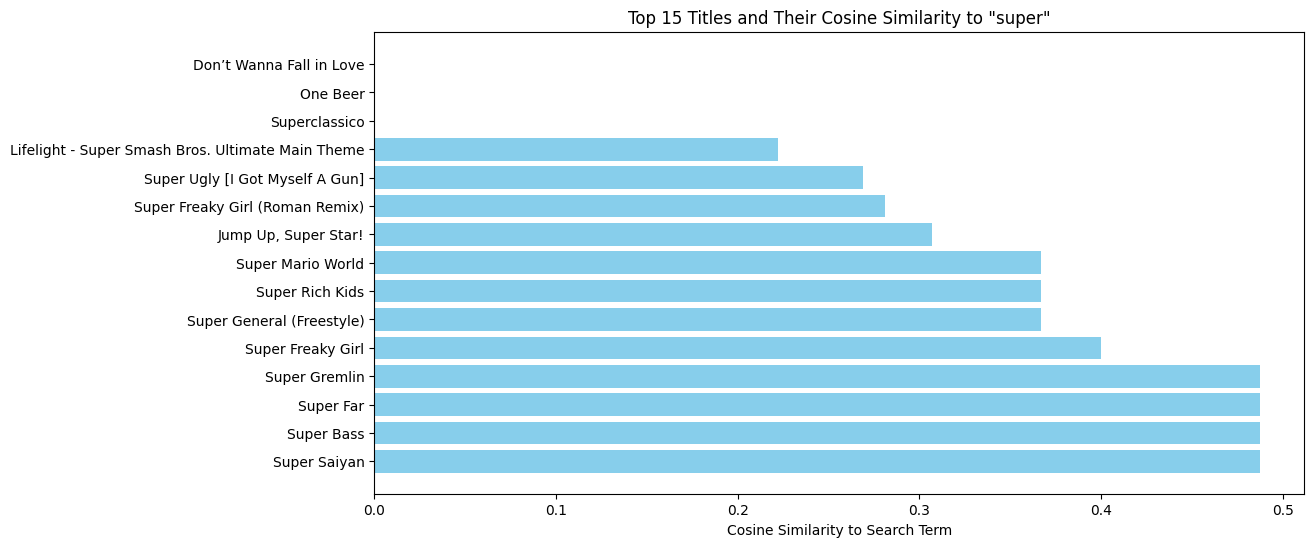

Based on Nearest neighbors, the recommended titles are: Super Bass, Super Saiyan, Super Far, Super Gremlin, Super Freaky Girl
 
Top 5 Recommended titles based on cosine similarity:
Super Saiyan by Lil Uzi Vert
Super Bass by Nicki Minaj
Super Far by LANY
Super Gremlin by Kodak Black
Super Freaky Girl by Nicki Minaj


In [464]:
#RECOMMENDATION BASED ON TITLES

# Extract titles and artists from all_hits
titles = [hit['result']['title'] for hit in all_hits]
artists = [hit['result']['primary_artist']['name'] for hit in all_hits]

if len(titles) == 0:
    print("There are no songs with the search term")
else:
    # Feature Extraction (Use TF-IDF to convert titles into numerical vectors)
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(titles)

    # Model Selection use Nearest Neighbors
    knn_model = NearestNeighbors(n_neighbors=5, metric='cosine')
    knn_model.fit(tfidf_matrix)

    # Use t-SNE to project the data into a 2D space
    tsne = TSNE(n_components=2, random_state=42)
    #tsne_results = tsne.fit_transform(tfidf_matrix.toarray())

    subset_indices = np.random.choice(tfidf_matrix.shape[0], size=1000)
    tsne_results = tsne.fit_transform(tfidf_matrix[subset_indices].toarray())

    # Preprocess the search term and titles
    search_vector = tfidf_vectorizer.transform([search_term])
    titles_vector = tfidf_vectorizer.transform(titles)
    cosine_similarities = cosine_similarity(search_vector, tfidf_matrix).flatten()

    distances, indices = knn_model.kneighbors(search_vector, n_neighbors=5)
    recommended_titles = [titles[i] for i in indices[0]] # recommended titles based on nearest neighbors

    # recommendation based on cosine similarity
    # Get indices of titles sorted by similarity (closest first)
    sorted_indices = np.argsort(cosine_similarities)[::-1]

    # Visualize the relationships in a scatter plot
    plt.figure(figsize=(12, 6))
    plt.scatter(cosine_similarities[sorted_indices], np.arange(len(titles)), alpha=0.7)

    # Annotate the top 15 closest titles close to the search term
    num_titles_to_annotate = 15
    if len(titles) < 15:
      num_titles_to_annotate = len(titles)
    for i in range(num_titles_to_annotate):
        title_index = sorted_indices[i]
        plt.annotate(titles[title_index], (cosine_similarities[title_index], title_index), alpha=0.7)

    # show shatter plot
    plt.xlabel('Cosine Similarity to Search Term')
    plt.ylabel('Titles')
    plt.title(f'Cosine Similarity of Titles to "{search_term}"')
    plt.show()

    # Select the top 15 titles and their cosine similarity values
    top_titles = [titles[i] for i in sorted_indices[:num_titles_to_annotate]]
    top_cosine_similarities = cosine_similarities[sorted_indices[:num_titles_to_annotate]]

    # Create a bar plot for the top titles and their cosine similarity values
    plt.figure(figsize=(12, 6))
    plt.barh(top_titles, top_cosine_similarities, color='skyblue')
    plt.xlabel('Cosine Similarity to Search Term')
    plt.title(f'Top {num_titles_to_annotate} Titles and Their Cosine Similarity to "{search_term}"')
    plt.show()

    # top 5 titles who have a cosine similarity of greater than 0
    selected_titles = [
        {'title': titles[i], 'artist': artists[i]}
        for i in sorted_indices
        if cosine_similarities[i] > 0
    ][:5]

    print(f"Based on Nearest neighbors, the recommended titles are: {', '.join(recommended_titles)}\n ")


    # Print the selected titles
    print(f'Top {5} Recommended titles based on cosine similarity:')
    for entry in selected_titles:
        print(f"{entry['title']} by {entry['artist']}")



In [465]:
# Get lyrics from the title urls

def scrape_lyrics(url):
    page = requests.get(url)
    html = BeautifulSoup(page.text, 'html.parser')


    # Find the element containing the lyrics
    lyrics_elements = html.find_all('div', class_='Lyrics__Container-sc-1ynbvzw-1 kUgSbL')



    # Check if the lyrics element was found
    if lyrics_elements:
        # Extract the text from all found lyrics elements
        lyrics = ''
        for lyrics_element in lyrics_elements:
            lyrics += '\n'.join([line.strip() for line in lyrics_element.stripped_strings])
            lyrics += '\n\n'  # Add extra newline between sections (you can adjust this as needed)

        # Remove identifiers like chorus, verse, etc.
        lyrics = re.sub(r'\[[^\]]*\]|\*\*.*?\*\*', '', lyrics)

        # Remove empty lines
        lyrics = os.linesep.join([s for s in lyrics.splitlines() if s])

        return lyrics

# Initialize a list to store lyrics for each song
all_lyrics = []


lyric_error = 0
# Loop through the hits, scrape lyrics, and put the lyrics for that hit into an array
if (len(all_hits) == 0):
    print("No songs were returned for search term, so no lyrics can be provided")
else:
    for hit in all_hits:
        url = hit['result']['url']

        lyrics = scrape_lyrics(url)
        if lyrics:
          all_lyrics.append(lyrics)
          print(f"Lyrics from {hit['result']['title']} by {hit['result']['primary_artist']['name']} scraped successfully.\n")
        else:
          if lyric_error == 0:
            print("Unfortunately, Genius.com no longer recognizes you as a human :( ")
            lyric_error=1
          print(f"Lyrics from {hit['result']['title']} by {hit['result']['primary_artist']['name']} COULD NOT be scraped successfully.")




Unfortunately, Genius.com no longer recognizes you as a human :( 
Lyrics from ​iSpy by KYLE COULD NOT be scraped successfully.
Lyrics from Superman by Eminem COULD NOT be scraped successfully.
Lyrics from Super Rich Kids by Frank Ocean COULD NOT be scraped successfully.
Lyrics from Supermarket Flowers by Ed Sheeran COULD NOT be scraped successfully.
Lyrics from Super Bass by Nicki Minaj COULD NOT be scraped successfully.
Lyrics from Supermodel by SZA COULD NOT be scraped successfully.
Lyrics from Super Far by LANY COULD NOT be scraped successfully.
Lyrics from Súper Jon Z (Residente Challenge) by Jon Z COULD NOT be scraped successfully.
Lyrics from Doomsday by MF DOOM COULD NOT be scraped successfully.
Lyrics from Super Freaky Girl by Nicki Minaj COULD NOT be scraped successfully.
Lyrics from Rapp Snitch Knishes by MF DOOM COULD NOT be scraped successfully.
Lyrics from Mi Gna by Super Sako COULD NOT be scraped successfully.
Lyrics from Beef Rap by MF DOOM COULD NOT be scraped successfu

In [466]:
#RECOMMENDATION BASED ON LYRICS could not be urilized due to restrictions with webscraping the lyrics from pages and user guidlines.

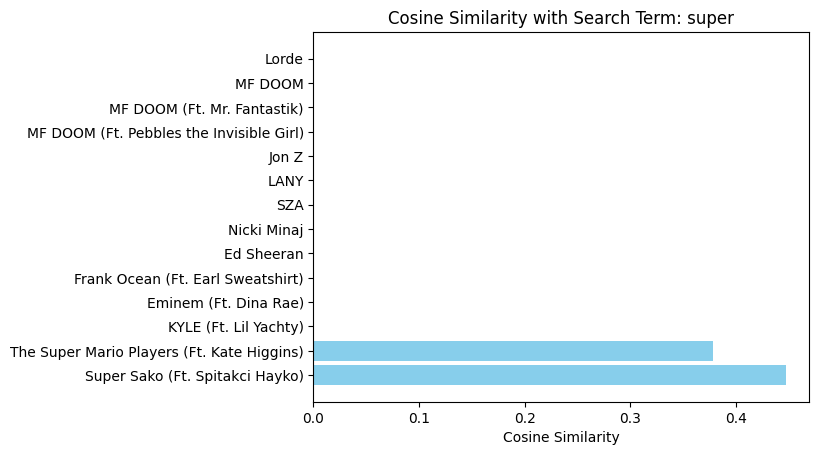

Top 5 artists similar to 'super':
Super Sako (Ft. Spitakci Hayko) has a similarity of around 44.72%
The Super Mario Players (Ft. Kate Higgins) has a similarity of around 37.8%


In [467]:
# Recommendation based off of similarity between search term and artist name

# Initialize lists to store similarity scores and artist names
similarity_scores = []
artist_names = []


for hit in all_hits:
    # Get the artist's name
    artist_name = hit['result']['artist_names']

    # Calculate cosine similarity
    vectorizer = CountVectorizer().fit_transform([artist_name, search_term])
    cosine_sim = cosine_similarity(vectorizer)

    # Append similarity score and artist name to lists
    similarity_scores.append(cosine_sim[0, 1])
    artist_names.append(artist_name)

# Get indices of the top 15 artists
top_indices = sorted(range(len(similarity_scores)), key=lambda i: similarity_scores[i], reverse=True)[:15]

# Plot the results for the top 15 artists
plt.barh([artist_names[i] for i in top_indices], [similarity_scores[i] for i in top_indices], color='skyblue')
plt.xlabel('Cosine Similarity')
plt.title(f'Cosine Similarity with Search Term: {search_term}')
plt.show()

# Recommend top 5 based on similarity
top_artists = [artist_names[i] for i in top_indices[:5]]
top_scores = [similarity_scores[i] for i in top_indices[:5]]

# Print the top 5 recommendations
if all(score == 0 for score in top_scores):
    print(f"No artists have a name similar to '{search_term}'.")
else:
    print(f"Top 5 artists similar to '{search_term}':")
    for artist, score in zip(top_artists, top_scores):
        score_percentage = round(score * 100, 2)

        if score_percentage == 0:
            continue

        print(f"{artist} has a similarity of around {score_percentage}%")

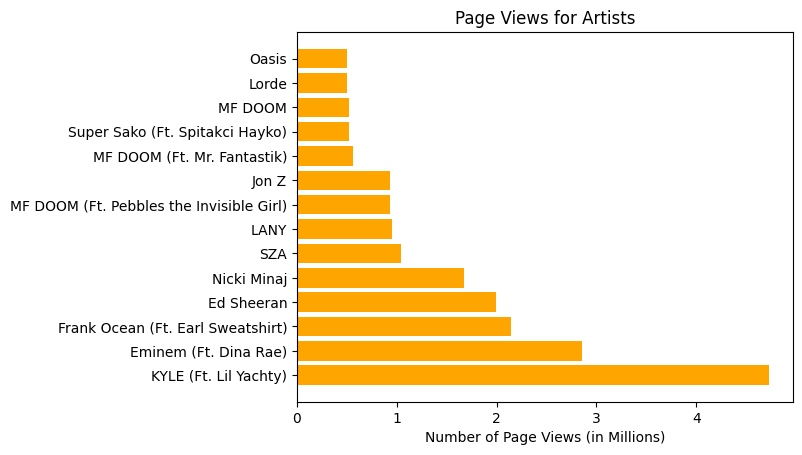

Top 5 artists with highest page views:
KYLE (Ft. Lil Yachty)'s ​iSpy has 4732513 page views
Eminem (Ft. Dina Rae)'s Superman has 2855105 page views
Frank Ocean (Ft. Earl Sweatshirt)'s Super Rich Kids has 2141707 page views
Ed Sheeran's Supermarket Flowers has 1993705 page views
Nicki Minaj's Super Bass has 1677401 page views


In [468]:
# Initialize lists to store page views and artist names
page_views = []

for hit in all_hits:
    # Get the artist's name
    artist_name = hit['result']['artist_names']
    title = hit['result']['title']

    try:
        # Get the page views
        page_view = hit['result']['stats']['pageviews']
    except KeyError:
        # If there's a KeyError, continue to the next iteration
        continue

    # Append page views to the list
    page_views.append(page_view)

# Get the highest page view to determine the scale for the x-axis labels
if len(page_views) == 0:
    print("None of the artists have page views")
else:
    # Determine the appropriate scale (billions, millions, thousands)
    if max(page_views) >= 1e9:
        scale = 1e9
        scale_label = 'Billions'
    elif max(page_views) >= 1e6:
        scale = 1e6
        scale_label = 'Millions'
    elif max(page_views) >= 1e3:
        scale = 1e3
        scale_label = 'Thousands'
    else:
        scale = 1
        scale_label = ''

    # Scale the page views accordingly
    scaled_page_views = [view / scale for view in page_views]

    # Get indices of the top 15 artists by page views
    top_indices_page_views = sorted(
        [i for i, v in enumerate(scaled_page_views) if v > 0],
        key=lambda i: scaled_page_views[i],
        reverse=True
    )[:15]

    # Plot the results for the top 15 artists by page views
    plt.barh([artist_names[i] for i in top_indices_page_views], [scaled_page_views[i] for i in top_indices_page_views], color='orange')
    plt.xlabel(f'Number of Page Views (in {scale_label})')
    plt.title('Page Views for Artists')
    plt.show()

    # Recommend top 5 based on page views
    top_artists_page_views = [artist_names[i] for i in top_indices_page_views[:5]]
    top_page_views = [page_views[i] for i in top_indices_page_views[:5]]
    top_titles_for_page_view = [titles[i] for i in top_indices_page_views[:5]]

    # Print the top 5 recommendations for page views
    print(f"Top 5 artists with highest page views:")
    for artist, title, page_view in zip(top_artists_page_views, top_titles_for_page_view, top_page_views):
        print(f"{artist}'s {title} has {page_view} page views")


In [469]:
# Get user input for the year and month
user_year = input("Enter the year (e.g., 2023): ")
user_month = input("Enter the month (e.g., 11 for November): ")

# Initialize lists to store song information
songs_by_year = []
songs_by_month = []

for hit in all_hits:
    # Get the release date components
    release_date = hit['result']['release_date_components']

    # Check if the release date is available
    if release_date and 'year' in release_date:
        # Check if the song was released in the user-specified year
        if str(release_date['year']) == user_year:
            songs_by_year.append(hit)

        # Check if the song was released in the user-specified month and year
        if 'month' in release_date and str(release_date['month']) == user_month and str(release_date['year']) == user_year:
            songs_by_month.append(hit)

# Display the top 5 songs by year
print(f"\nTop 5 songs released in {user_year}:")
for i, song in enumerate(songs_by_year[:5]):
    print(f"{i + 1}. {song['result']['title']} by {song['result']['primary_artist']['name']}")

# Display the top 5 songs by month
print(f"\nTop 5 songs released in {user_month}/{user_year}:")
for i, song in enumerate(songs_by_month[:5]):
    print(f"{i + 1}. {song['result']['title']} by {song['result']['primary_artist']['name']}")

Enter the year (e.g., 2023): 2016
Enter the month (e.g., 11 for November): 8

Top 5 songs released in 2016:
1. ​iSpy by KYLE
2. Super Mario World by Logic
3. Супермаркет (Supermarket) by Пошлая Молли (Poshlaya Molly)
4. Doubt It by KYLE

Top 5 songs released in 8/2016:
1. Doubt It by KYLE


In [470]:
# Initialize lists to store similarity scores, titles, and hotness
similarity_scores = []
titles = []
hotness = []

# Filter out hits that are not hot
hot_hits = [hit for hit in all_hits if hit['result']['stats']['hot']]

for hit in hot_hits:
    # Get the title
    title = hit['result']['title']

    # Get the hotness (assuming 'hot' is a boolean field in stats)
    is_hot = hit['result']['stats']['hot']

    # Calculate cosine similarity with search term
    vectorizer = CountVectorizer().fit_transform([title, search_term])
    cosine_sim = cosine_similarity(vectorizer)

    # Append similarity score, title, and hotness to lists
    similarity_scores.append(cosine_sim[0, 1])
    titles.append(title)
    hotness.append(is_hot)


# Get indices of the top 5 songs based on similarity
top_hot_indices = sorted(range(len(similarity_scores)),
                     key=lambda i: similarity_scores[i],
                     reverse=True)[:5]

# Print the top 5 recommendations

if len(top_hot_indices)==0:
    print("No songs are currently hot that match the search term(s)")
else:
    print(f"Top 5 hottest songs based on a similarity to '{search_term}':")
    for i in top_hot_indices:
        print(f"{i+1}. {titles[i]} by {hit['result']['artist_names']}")

No songs are currently hot that match the search term(s)


In [471]:
#Final Recommendations

print(f"FINAL RECOMMENDATIONS: This is what I got from the {search_term} search term(s)\n\n")

i = 1
# Print the selected titles
print(f'Top {5} Recommended titles based on cosine similarity:\n')
for entry in selected_titles:
    print(f"{i}.{entry['title']} by {entry['artist']}")
    i=i+1

print("\n=========================================================================================\n")

# Print the top 5 recommendations
if all(score == 0 for score in top_scores):
    print(f"No artists have a name similar to '{search_term}'.\n")
else:
    j = 1
    print(f"Top 5 artists similar to '{search_term}':\n")
    for artist, score in zip(top_artists, top_scores):
        score_percentage = round(score * 100, 2)

        if score_percentage == 0:
            continue
        print(f"{j}. {artist} has a similarity of around {score_percentage}%")
        j=j+1

print("\n=========================================================================================\n")


# Print the top 5 recommendations for page views
if len(page_views) == 0:
    print("None of the artists have page views\n")
else:
    k = 1
    print(f"Top 5 artists with highest page views:\n")
    for artist, title, page_view in zip(top_artists_page_views, top_titles_for_page_view, top_page_views):
        print(f"{k}. {artist}'s {title} has {page_view} page views")
        k=k+1

print("\n=========================================================================================\n")


# Display the top 5 songs by year
print(f"\nTop 5 songs released in {user_year}:\n")
for i, song in enumerate(songs_by_year[:5]):
    print(f"{i + 1}. {song['result']['title']} by {song['result']['primary_artist']['name']}")

print("\n=========================================================================================\n")


# Display the top 5 songs by month
print(f"\nTop 5 songs released in {user_month}/{user_year}:\n")
for i, song in enumerate(songs_by_month[:5]):
    print(f"{i + 1}. {song['result']['title']} by {song['result']['primary_artist']['name']}")

print("\n=========================================================================================\n")


# Print the top 5 recommendations

if len(top_hot_indices)==0:
    print("No songs are currently hot that match the search term(s)\n")
else:
    print(f"Top 5 hottest songs based on a similarity to '{search_term}':\n")
    for i in top_hot_indices:
        print(f"{i+1}. {titles[i]} by {hit['result']['artist_names']}")

FINAL RECOMMENDATIONS: This is what I got from the super search term(s)


Top 5 Recommended titles based on cosine similarity:

1.Super Saiyan by Lil Uzi Vert
2.Super Bass by Nicki Minaj
3.Super Far by LANY
4.Super Gremlin by Kodak Black
5.Super Freaky Girl by Nicki Minaj


Top 5 artists similar to 'super':

1. Super Sako (Ft. Spitakci Hayko) has a similarity of around 44.72%
2. The Super Mario Players (Ft. Kate Higgins) has a similarity of around 37.8%


Top 5 artists with highest page views:

1. KYLE (Ft. Lil Yachty)'s ​iSpy has 4732513 page views
2. Eminem (Ft. Dina Rae)'s Superman has 2855105 page views
3. Frank Ocean (Ft. Earl Sweatshirt)'s Super Rich Kids has 2141707 page views
4. Ed Sheeran's Supermarket Flowers has 1993705 page views
5. Nicki Minaj's Super Bass has 1677401 page views



Top 5 songs released in 2016:

1. ​iSpy by KYLE
2. Super Mario World by Logic
3. Супермаркет (Supermarket) by Пошлая Молли (Poshlaya Molly)
4. Doubt It by KYLE



Top 5 songs released in 8/2016: